In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
np.random.seed(0)

Temperature = np.random.normal(30, 3, 100)
Weather = np.random.randint(2, size=100) # 0은 맑은날 1은 비오는 날
IceAmericano = Temperature + np.random.normal(100, 10, 100)

In [26]:
df = pd.DataFrame(
    {"Temp": Temperature,
     "Weather": Weather,
     "Sales": IceAmericano}
)

In [133]:
df["Weather"] = df["Weather"].astype('category')

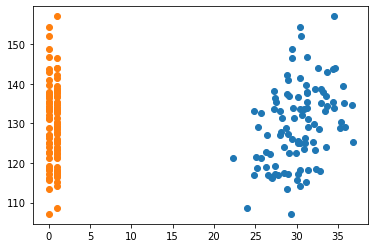

In [43]:
plt.plot(df[['Temp', 'Weather']], df['Sales'], 'o')
plt.show()

In [139]:
InputFeature = df[["Temp", "Weather"]]
InputFeature 

,Temp,Weather
0,35.292157,0
1,31.200472,0
2,32.936214,1
3,36.722680,1
4,35.602674,1
...,...,...
95,32.119720,1
96,30.031500,0
97,35.357611,1
98,30.380736,0


In [141]:
model = Sequential()

In [142]:
model.add(Dense(30, activation="linear", input_shape=(2,)))
model.add(Dense(1, activation="linear"))

model.compile(optimizer=Adam(learning_rate=0.5), loss="mse")

In [143]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 30)                90        
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.fit(x=df[["Temp", "Weather"]], y=df[["Sales"]], shuffle=True, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 998us/step - loss: 130.7635
Epoch 2/50
4/4 [==============================] - 0s 665us/step - loss: 129.6369
Epoch 3/50
4/4 [==============================] - 0s 997us/step - loss: 258.1956
Epoch 4/50
4/4 [==============================] - 0s 997us/step - loss: 324.3598
Epoch 5/50
4/4 [==============================] - 0s 665us/step - loss: 230.3762
Epoch 6/50
4/4 [==============================] - 0s 665us/step - loss: 131.5757
Epoch 7/50
4/4 [==============================] - 0s 666us/step - loss: 241.7795
Epoch 8/50
4/4 [==============================] - 0s 664us/step - loss: 202.9998
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 169.3182
Epoch 10/50
4/4 [==============================] - 0s 997us/step - loss: 143.5464
Epoch 11/50
4/4 [==============================] - 0s 665us/step - loss: 135.8603
Epoch 12/50
4/4 [==============================] - 0s 665us/step - loss: 124.3063
Epoch 13/50
4/4 [==========

In [ ]:
model.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Temp     100 non-null    float64 
 1   Weather  100 non-null    category
 2   Sales    100 non-null    float64 
 3   pred     100 non-null    float32 
dtypes: category(1), float32(1), float64(2)
memory usage: 2.3 KB


In [89]:
df[["Temp", "Weather"]]

,Temp,Weather
0,35.292157,0
1,31.200472,0
2,32.936214,1
3,36.722680,1
4,35.602674,1
...,...,...
95,32.119720,1
96,30.031500,0
97,35.357611,1
98,30.380736,0


In [145]:
model.predict(df[["Temp", "Weather"]])

array([[142.61737 ],
       [129.8209  ],
       [134.08546 ],
       [145.92737 ],
       [142.42462 ],
       [116.8974  ],
       [133.81667 ],
       [123.48257 ],
       [123.93423 ],
       [128.75502 ],
       [127.417984],
       [139.71095 ],
       [132.04292 ],
       [126.04423 ],
       [130.23097 ],
       [129.19714 ],
       [140.08441 ],
       [122.97778 ],
       [127.839935],
       [118.05314 ],
       [100.949745],
       [131.03511 ],
       [133.01305 ],
       [117.93944 ],
       [146.19817 ],
       [112.42122 ],
       [126.49583 ],
       [124.3103  ],
       [139.28363 ],
       [139.8525  ],
       [126.35639 ],
       [129.61455 ],
       [116.57317 ],
       [106.31822 ],
       [122.80231 ],
       [127.533424],
       [137.60947 ],
       [136.18375 ],
       [122.432495],
       [123.23023 ],
       [115.06482 ],
       [111.57963 ],
       [108.89393 ],
       [143.2054  ],
       [121.2848  ],
       [120.7925  ],
       [114.31241 ],
       [133.3

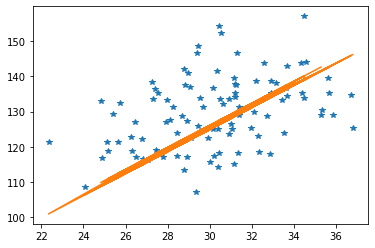

In [146]:
plt.plot(df["Temp"], df["Sales"], '*')

plt.plot(df[["Temp"]], model.predict(df[["Temp", "Weather"]]))


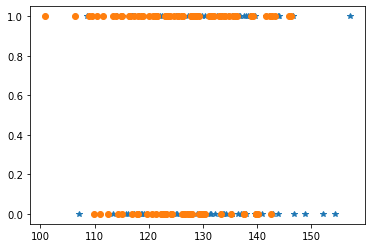

In [147]:
plt.plot(df["Sales"], df["Weather"], '*')
plt.plot(model.predict(df[["Temp", "Weather"]]), df[["Weather"]], 'o')

TypeError: plot got an unexpected keyword argument 'x'

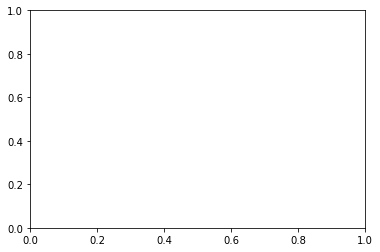

In [148]:
plt.plot(kind='bar', y=model.predict(df[["Temp", "Weather"]]), x=df["Weather"])

In [124]:
df["pred"] = model.predict(df[["Temp", "Weather"]])

In [125]:
df

,Temp,Weather,Sales,pred
0,35.292157,0,128.933696,145.277954
1,31.200472,0,137.964805,130.552933
2,32.936214,1,138.702122,135.339066
3,36.722680,1,134.639692,148.965668
4,35.602674,1,139.562741,144.935043
...,...,...,...,...
95,32.119720,1,129.740502,132.400696
96,30.031500,0,115.790891,126.346062
97,35.357611,1,130.424413,144.053131
98,30.380736,0,124.952122,127.602890


<AxesSubplot:xlabel='Temp', ylabel='pred'>

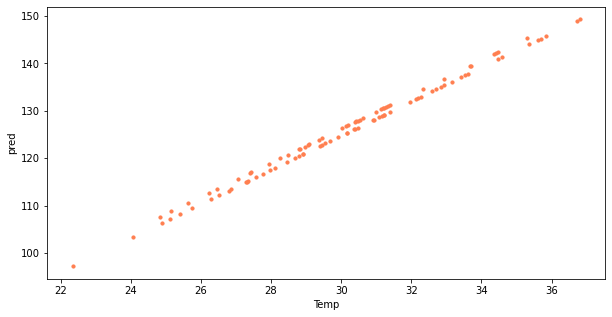

In [149]:
df.plot(kind='scatter', x='Temp', y='pred', c='coral', s=10, figsize=(10, 5)) # s는 점의크기

KeyError: 'weight'

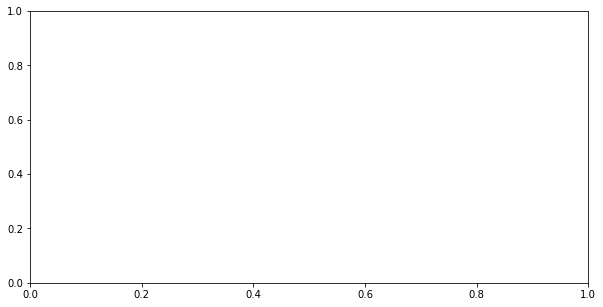

In [122]:
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5)) # s는 점의크기

<AxesSubplot:>

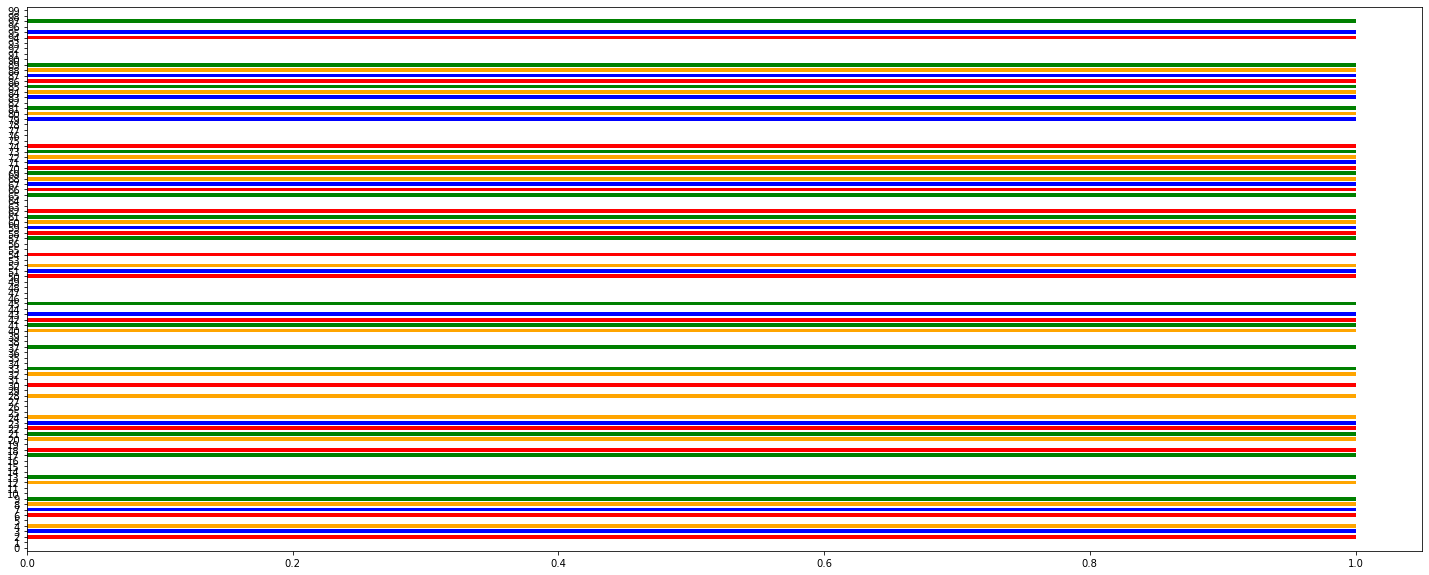

In [132]:
df["Weather"].plot(kind='barh', figsize=(25, 10), width=0.7,
              color=['orange', 'green', 'red', 'blue']
              )

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']